In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
from itertools import cycle
import matplotlib.patheffects as PathEffects
import utils as ut

from astropy.units import cds
import astropy.units as u

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#Read Emily's into a dictionary of astropy tables
# Valsecchi_mass_radius_relation = (Table.read('M-R_Mcore-1ME.txt', names=('mass', 'radius'), format='ascii'), 
#                                   Table.read('M-R_Mcore-5ME.txt', names=('mass', 'radius'), format='ascii'), 
#                                   Table.read('M-R_Mcore-10ME.txt', names=('mass', 'radius'), format='ascii'), 
#                                   Table.read('M-R_Mcore-15ME.txt', names=('mass', 'radius'), format='ascii'),
#                                   Table.read('M-R_Mcore-30ME.txt', names=('mass', 'radius'), format='ascii'))

Valsecchi_mass_radius_relation = (Table.read('1M.txt', names=('mass', 'radius'), format='ascii'), 
                                  Table.read('5M.txt', names=('mass', 'radius'), format='ascii'), 
                                  Table.read('10M.txt', names=('mass', 'radius'), format='ascii'), 
                                  Table.read('15M.txt', names=('mass', 'radius'), format='ascii'),
                                  Table.read('30M.txt', names=('mass', 'radius'), format='ascii'))

In [3]:
core_masses = [1.*cds.Mgeo, 5.*cds.Mgeo, 10.*cds.Mgeo, 15.*cds.Mgeo, 30.*cds.Mgeo]

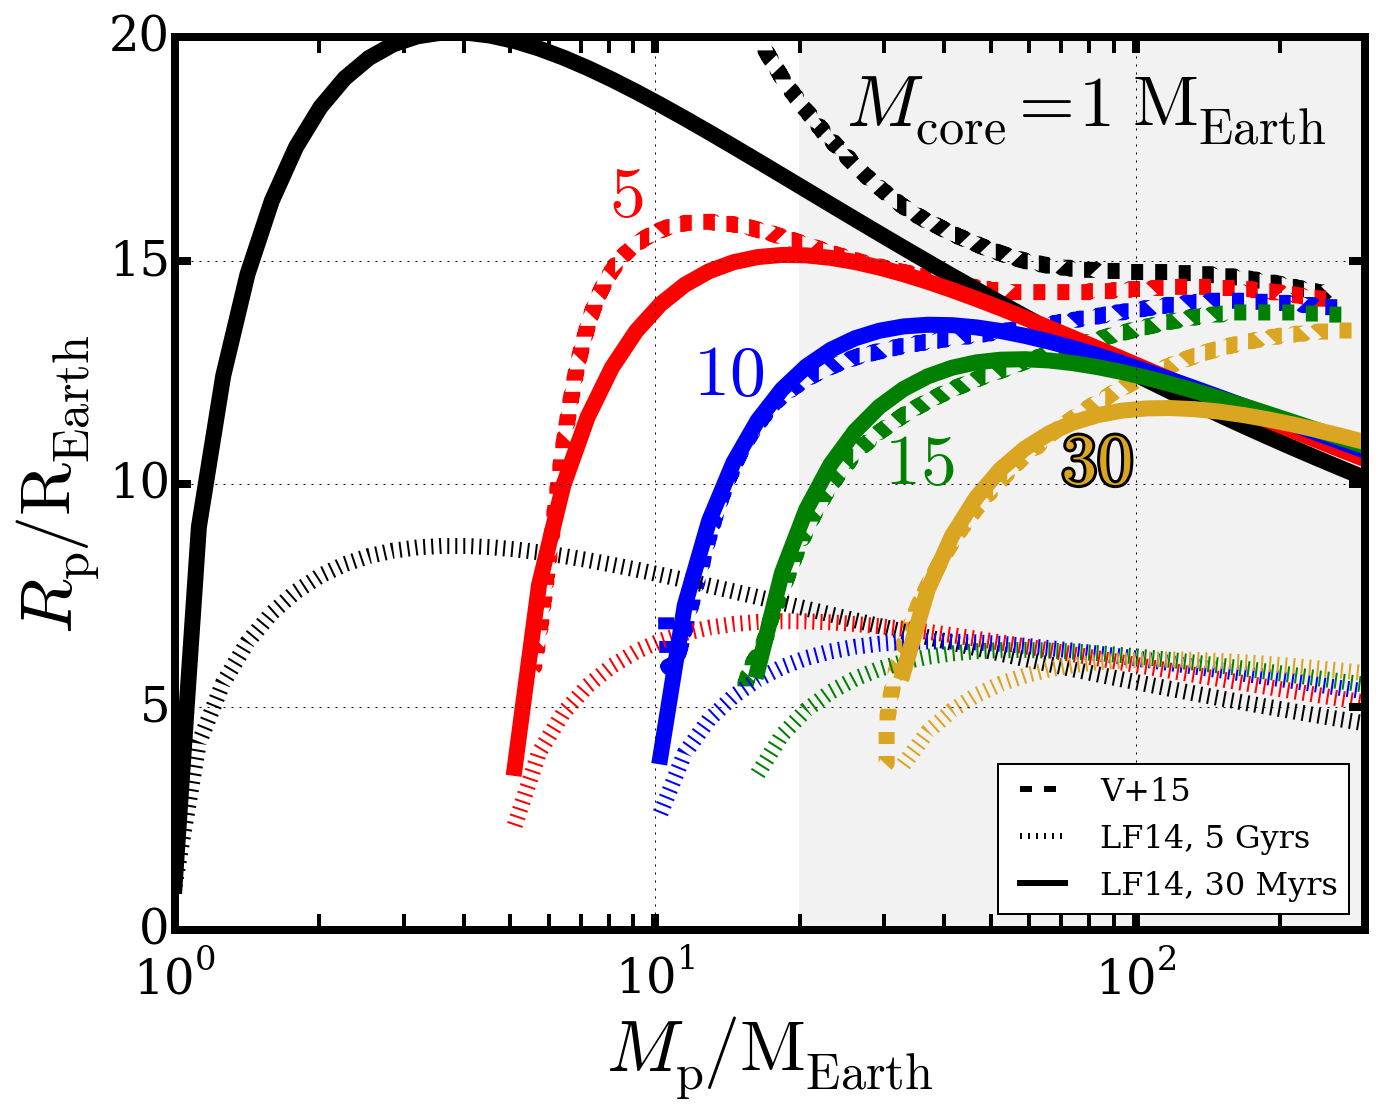

In [6]:
import matplotlib.lines as mlines

fig = plt.figure(figsize=(8*4./3, 8))
ax = fig.add_subplot(111)
lc = cycle(['black', 'red', 'blue', 'green', 'goldenrod'])
ls = cycle(['-', '--'])

for i in range(len(Valsecchi_mass_radius_relation)):
    cur_color = next(lc)
    ax.semilogx(Valsecchi_mass_radius_relation[i]['mass'], 
                Valsecchi_mass_radius_relation[i]['radius'], 
                lw=8, color=cur_color, ls='--')

#     if(cur_color != 'gold'):
#         ax.semilogx(Valsecchi_mass_radius_relation[i]['mass'], 
#                     Valsecchi_mass_radius_relation[i]['radius'], 
#                     lw=8, color=cur_color, ls='--')
#     else:
#         ax.semilogx(Valsecchi_mass_radius_relation[i]['mass'], 
#                     Valsecchi_mass_radius_relation[i]['radius'], 
#                     lw=8, color=cur_color, ls='--', 
#                     path_effects=[PathEffects.withStroke(linewidth=12, foreground="k")])

ax.text(25, 18, '$M_{\\rm core} = {\\rm 1\ M_{Earth}}$', fontsize=36, color=next(lc))
ax.text(8, 16, '${\\rm 5}$', fontsize=36, color=next(lc))
ax.text(12, 12, '${\\rm 10}$', fontsize=36, color=next(lc))
ax.text(30, 10, '${\\rm 15}$', fontsize=36, color=next(lc))
ax.text(70, 10, '${\\rm 30}$', fontsize=36, color=next(lc), 
        path_effects=[PathEffects.withStroke(linewidth=3, foreground="k")])

Mps = 10**(np.linspace(0., np.log10(300.)))
for i in range(len(core_masses)):
    
    cur_color = next(lc)
    
    fenvs = 1. - core_masses[i].value/Mps
    ax.semilogx(Mps, ut.Lopez_superearth_radius(Mps, fenv=fenvs, age=30e6*u.year), 
                lw=8, color=cur_color)
    ax.semilogx(Mps, ut.Lopez_superearth_radius(Mps, fenv=fenvs, age=5e9*u.year), 
                lw=8, color=cur_color, ls=':')
    
#     if(cur_color != 'gold'):
#         ax.semilogx(Mps, ut.Lopez_superearth_radius(Mps, fenv=fenvs, age=30e6*u.year), 
#                     lw=8, color=cur_color)
#         ax.semilogx(Mps, ut.Lopez_superearth_radius(Mps, fenv=fenvs, age=5e9*u.year), 
#                     lw=8, color=cur_color, ls=':')
#     else:
#         ax.semilogx(Mps, ut.Lopez_superearth_radius(Mps, fenv=fenvs, age=30e6*u.year), 
#                     lw=8, color=cur_color, 
#                     path_effects=[PathEffects.withStroke(linewidth=12, foreground="k")])
#         ax.semilogx(Mps, ut.Lopez_superearth_radius(Mps, fenv=fenvs, age=5e9*u.year), 
#                     lw=8, color=cur_color, ls=':', 
#                     path_effects=[PathEffects.withStroke(linewidth=12, foreground="k")])

# ax.text(1.1, 2, '${\\rm 1}$', fontsize=36, color=next(lc))
# ax.text(6, 2, '${\\rm 5}$', fontsize=36, color=next(lc))
# ax.text(10.5, 2, '${\\rm 10}$', fontsize=36, color=next(lc))
# ax.text(17, 3, '${\\rm 15}$', fontsize=36, color=next(lc))
# ax.text(40, 4, '${\\rm 30}$', fontsize=36, color=next(lc), 
#        path_effects=[PathEffects.withStroke(linewidth=3, foreground="k")])
        
ax.set_xlim([0, 300])
ax.set_ylim([0, 20])

Valsecchi_line = mlines.Line2D([], [], color='black', ls='--', label='V+15')
Lopez_line_5Gyrs = mlines.Line2D([], [], color='black', ls=':', label='LF14, 5 Gyrs')
Lopez_line_30Myrs = mlines.Line2D([], [], color='black', label='LF14, 30 Myrs')
ax.legend(handles=[Valsecchi_line, Lopez_line_5Gyrs, Lopez_line_30Myrs], loc='lower right', fontsize=16)

ax.axvspan(20, 300, color='0.95', zorder=-1)

ax.set_xlabel('$M_{\\rm p}/{\\rm M_{Earth}}$', fontsize=36)
ax.set_ylabel('$R_{\\rm p}/{\\rm R_{Earth}}$', fontsize=36)

#fig.savefig('compare_mass-radius_relations.eps', dpi=1000, bbox_inches='tight')

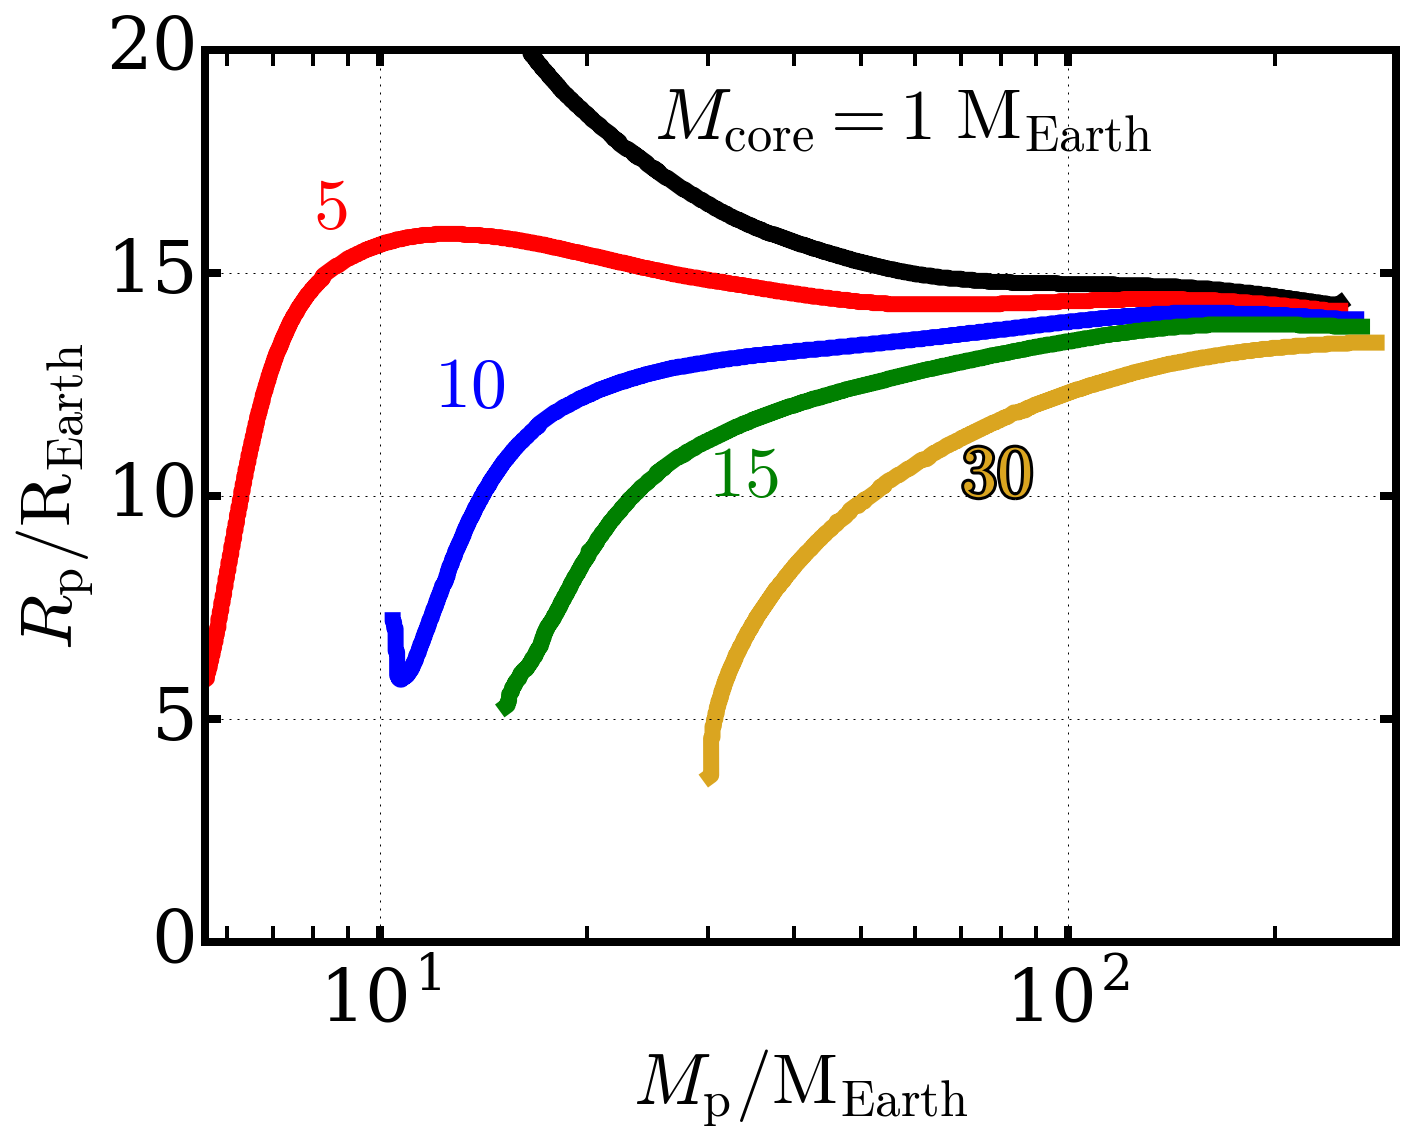

In [10]:
import matplotlib.lines as mlines

fig = plt.figure(figsize=(8*4./3, 8))
ax = fig.add_subplot(111)
lc = cycle(['black', 'red', 'blue', 'green', 'goldenrod'])
ls = cycle(['-', '--'])

for i in range(len(Valsecchi_mass_radius_relation)):
    cur_color = next(lc)
    ax.semilogx(Valsecchi_mass_radius_relation[i]['mass'], 
                Valsecchi_mass_radius_relation[i]['radius'], 
                lw=8, color=cur_color)

ax.text(25, 18, '$M_{\\rm core} = {\\rm 1\ M_{Earth}}$', fontsize=36, color=next(lc))
ax.text(8, 16, '${\\rm 5}$', fontsize=36, color=next(lc))
ax.text(12, 12, '${\\rm 10}$', fontsize=36, color=next(lc))
ax.text(30, 10, '${\\rm 15}$', fontsize=36, color=next(lc))
ax.text(70, 10, '${\\rm 30}$', fontsize=36, color=next(lc), 
        path_effects=[PathEffects.withStroke(linewidth=3, foreground="k")])

ax.set_xlim([0, 300])
ax.set_ylim([0, 20])

ax.set_xlabel('$M_{\\rm p}/{\\rm M_{Earth}}$', fontsize=36)
ax.set_ylabel('$R_{\\rm p}/{\\rm R_{Earth}}$', fontsize=36)

ax.tick_params(which='both', labelsize=36)

fig.savefig('compare_mass-radius_relations_just-Valsecchi.png', dpi=500, bbox_inches='tight')

In [ ]:
# plotting data to reproduce graph

%matplotlib inline
import matplotlib.pyplot as plt

plt.semilogx(x1,y1, label='1M')
plt.semilogx(x5,y5, label='5M')
plt.semilogx(x10,y10, label='10M' )
plt.semilogx(x15,y15, label='15M')
plt.semilogx(x30,y30, label='30M')
plt.legend()
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Reproduction of Valsecchi graph')

In [ ]:
# the equation for the envelopes radius, in terms of:
# mass M in earth masses, the fraction of mass in the envelope f, the flux F, and the planet's age

def envelope_radius(M,f,F,age):
    if f < 0:
        return 0
    
    return 2.06 * (M)**(-0.21) * (f/.05)**(0.59) * F**(0.044) * (age/5)**(-0.18)

In [ ]:
# defines the core radius in terms of the core mass M

def core_radius(M):
    return M**0.25

In [ ]:
# for a 1 earth mass core as a test/example

r1 = []
age = 2.0 # age Valsecchi paper uses in Gyr
F = 100 # standard value in Lopez paper

for val in x1:
    f = (val - 1) / val # fraction in envelope
    r1.append(core_radius(1) + envelope_radius(val,f,F,age))
    
plt.semilogx(x1,y1, '--b')
plt.semilogx(x1,r1, 'b')
plt.title('Mass-Radius Relationship Comparison: 1 M Core')
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')

In [ ]:
# the rest of the core masses

# 5 earth mass core

r5 = []
age = 2.0 # age Valsecchi paper uses in Gyr
F = 100 # standard value in Lopez paper

for val in x5:
    f = (val - 5) / val # fraction in envelope
    r5.append(core_radius(5) + envelope_radius(val,f,F,age))

# 10 earth mass core

r10 = []
age = 2.0 # age Valsecchi paper uses in Gyr
F = 100 # standard value in Lopez paper

for val in x10:
    f = (val - 10) / val # fraction in envelope
    r10.append(core_radius(10) + envelope_radius(val,f,F,age))

# 15 earth mass core

r15 = []
age = 2.0 # age Valsecchi paper uses in Gyr
F = 100 # standard value in Lopez paper

for val in x15:
    f = (val - 15) / val # fraction in envelope
    r15.append(core_radius(15) + envelope_radius(val,f,F,age))

# 30 earth mass core

r30 = []
age = 2.0 # age Valsecchi paper uses in Gyr
F = 100 # standard value in Lopez paper

for val in x30:
    f = (val - 30) / val # fraction in envelope
    r30.append(core_radius(30) + envelope_radius(val,f,F,age))

In [ ]:
# plot comparing bulk data using Lopez equation and Valsecchi data
# horizontal lines indicate core radius was bigger than allowed mass from data
# top lines correspond to Valsecchi data
# bottom lines correspond to Lopez equation

plt.semilogx(x1,y1, '--r')
plt.semilogx(x1,r1, 'r')
plt.semilogx(x5,y5, '--b')
plt.semilogx(x5,r5, 'b')
plt.semilogx(x10,y10, '--k')
plt.semilogx(x10,r10, 'k')
plt.semilogx(x15,y15, '--g')
plt.semilogx(x15,r15, 'g')
plt.semilogx(x30,y30, '--c')
plt.semilogx(x30,r30, 'c')
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Mass-Radius Relationship Comparison')

In [ ]:
# plot of just Lopez data

plt.semilogx(x1,r1, 'r', label='1M')
plt.semilogx(x5,r5, 'b', label='5M')
plt.semilogx(x10,r10, 'k', label='10M')
plt.semilogx(x15,r15, 'g', label='15M')
plt.semilogx(x30,r30, 'c', label='30M')
plt.legend()
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Mass-Radius Relation from Lopez')

In [ ]:
# individual core comparison plots

plt.semilogx(x5,y5, '--b')
plt.semilogx(x5,r5, 'b')
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Mass-Radius Relationship Comparison: 5 M Core')

In [ ]:
plt.semilogx(x10,y10, '--b')
plt.semilogx(x10,r10, 'b')
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Mass-Radius Relationship Comparison: 10 M Core')

In [ ]:
plt.semilogx(x15,y15, '--b')
plt.semilogx(x15,r15, 'b')
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Mass-Radius Relationship Comparison: 15 M Core')

In [ ]:
plt.semilogx(x30,y30, '--b')
plt.semilogx(x30,r30, 'b')
plt.xlabel('Mass in Earth Masses')
plt.ylabel('Radius in Earth Radii')
plt.title('Mass-Radius Relationship Comparison: 30 M Core')